In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
path = '/content/drive/My Drive/AI/hanoiweather1.csv'
data = pd.read_csv(path)

### ***Thu thập dữ liệu***

In [ ]:
print(data.head())
print(data.info())
print(data.describe())

     datetime  tempmax  tempmin  temp  humidity  precip  precipprob  \
0  1990-01-01     15.9     13.4  14.6      96.3     NaN         0.0   
1  1990-01-02     17.4     14.6  16.1      85.9     NaN         0.0   
2  1990-01-03     18.2     16.1  16.8      82.5     NaN         0.0   
3  1990-01-04     19.6     15.2  16.4      88.2     NaN         0.0   
4  1990-01-05     18.1     15.4  16.9      93.8     NaN         0.0   

  preciptype  windspeed  winddir  cloudcover  sealevelpressure conditions  
0        NaN        7.2     24.1       100.0            1015.9   Overcast  
1        NaN        7.2     25.0       100.0            1019.0   Overcast  
2        NaN        7.2     25.0       100.0            1019.7   Overcast  
3        NaN        7.2     50.0       100.0            1019.0   Overcast  
4        NaN        3.6     50.0        98.6            1018.5   Overcast  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12539 entries, 0 to 12538
Data columns (total 13 columns):
 #   Col

### ***Tiền xử lý dữ liệu***

In [ ]:
#Loại bỏ các hàng thiếu dữ liệu & trùng lặp

data.dropna(subset=['tempmax', 'tempmin', 'temp', 'humidity', 'winddir', 'cloudcover', 'sealevelpressure', 'preciptype'], inplace=True)
data.drop_duplicates(inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 12419 entries, 0 to 12538
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          12419 non-null  object 
 1   tempmax           12419 non-null  float64
 2   tempmin           12419 non-null  float64
 3   temp              12419 non-null  float64
 4   humidity          12419 non-null  float64
 5   precip            12419 non-null  float64
 6   precipprob        12419 non-null  float64
 7   preciptype        12419 non-null  int64  
 8   windspeed         12419 non-null  float64
 9   winddir           12419 non-null  float64
 10  cloudcover        12419 non-null  float64
 11  sealevelpressure  12419 non-null  float64
 12  conditions        12419 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.3+ MB
None


In [ ]:
#Chuyển đổi đối với các biến không có thứ tự

# lable encoding cho conditions
data['conditions'], unique_labels = pd.factorize(data['conditions'])
print(data.tail())

         datetime  tempmax  tempmin  temp  humidity  precip  precipprob  \
12534  2024-04-26     36.0     27.0  30.9      80.8     0.0         0.0   
12535  2024-04-27     40.0     27.0  32.2      69.9     0.0         0.0   
12536  2024-04-28     35.0     27.0  30.4      82.7     0.0         0.0   
12537  2024-04-29     34.0     28.0  30.2      85.3     0.0         0.0   
12538  2024-04-30     36.0     27.0  31.0      79.9     0.0         0.0   

       preciptype  windspeed  winddir  cloudcover  sealevelpressure  \
12534           0       18.4    109.0        44.4            1000.9   
12535           0       16.6     97.3         8.8             999.6   
12536           0       22.3     94.0        45.3            1001.9   
12537           0       20.5    107.4        72.9            1002.0   
12538           0       22.3     82.5        40.2             999.1   

       conditions  
12534           1  
12535           2  
12536           1  
12537           1  
12538           1  


In [ ]:
import numpy as np
data['preciptype'] = np.where(data['precip'] == 'rain', 1, 0)
print(data.head())
print(data.info())

     datetime  tempmax  tempmin  temp  humidity  precip  precipprob  \
0  1990-01-01     15.9     13.4  14.6      96.3     0.0         0.0   
1  1990-01-02     17.4     14.6  16.1      85.9     0.0         0.0   
2  1990-01-03     18.2     16.1  16.8      82.5     0.0         0.0   
3  1990-01-04     19.6     15.2  16.4      88.2     0.0         0.0   
4  1990-01-05     18.1     15.4  16.9      93.8     0.0         0.0   

   preciptype  windspeed  winddir  cloudcover  sealevelpressure  conditions  
0           0        7.2     24.1       100.0            1015.9           0  
1           0        7.2     25.0       100.0            1019.0           0  
2           0        7.2     25.0       100.0            1019.7           0  
3           0        7.2     50.0       100.0            1019.0           0  
4           0        3.6     50.0        98.6            1018.5           0  
<class 'pandas.core.frame.DataFrame'>
Index: 12419 entries, 0 to 12538
Data columns (total 13 columns):
 

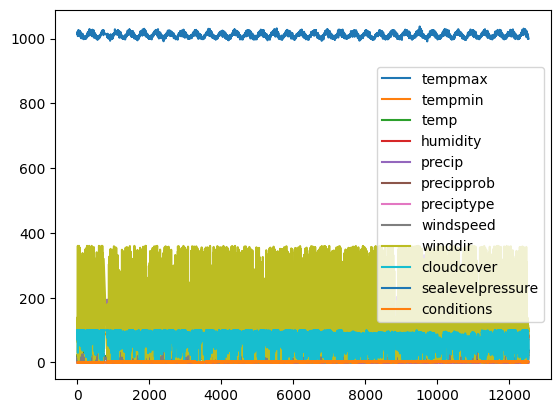

In [ ]:
#Biểu đồ thống kê tất cả dữ liệu sau bước tiền xử lý
import matplotlib.pyplot as plt
%matplotlib inline
data.plot()
plt.show()

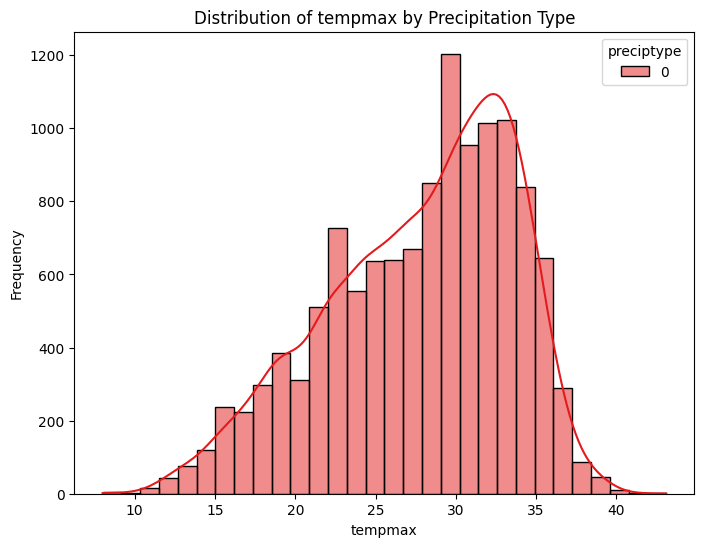

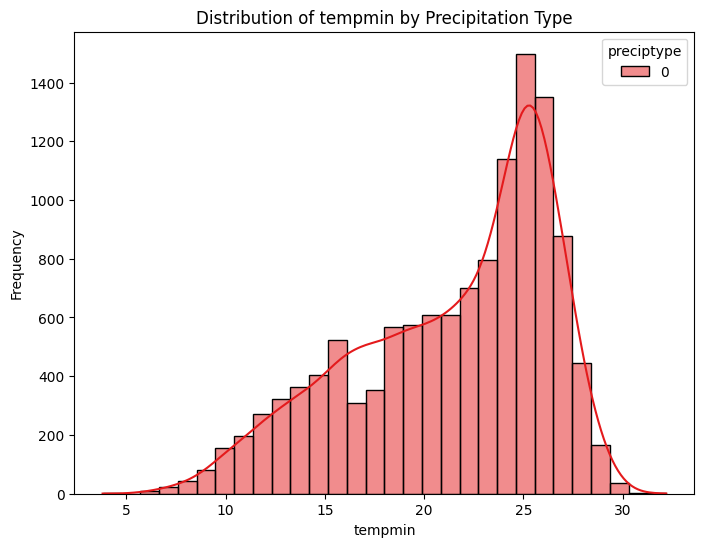

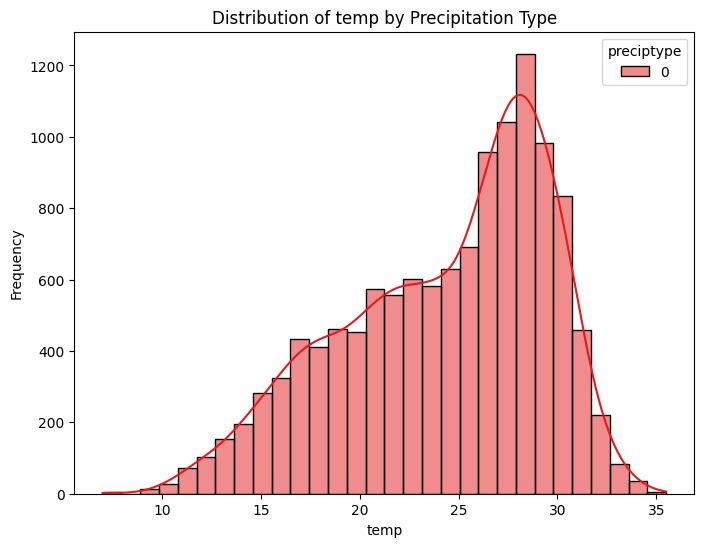

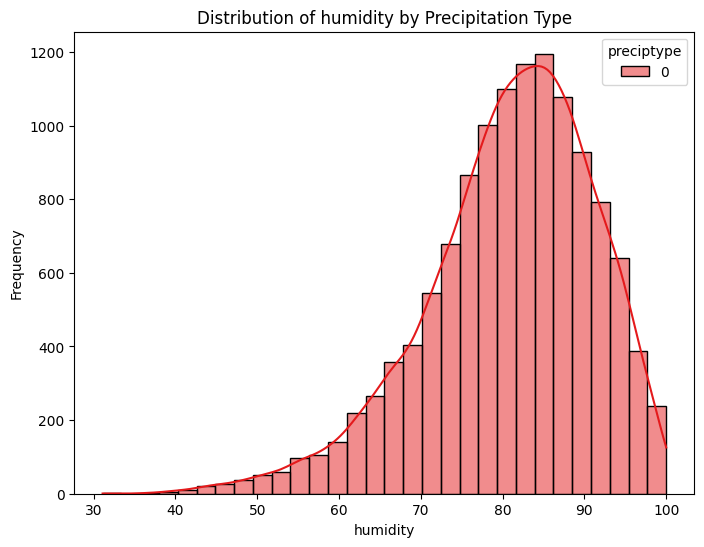

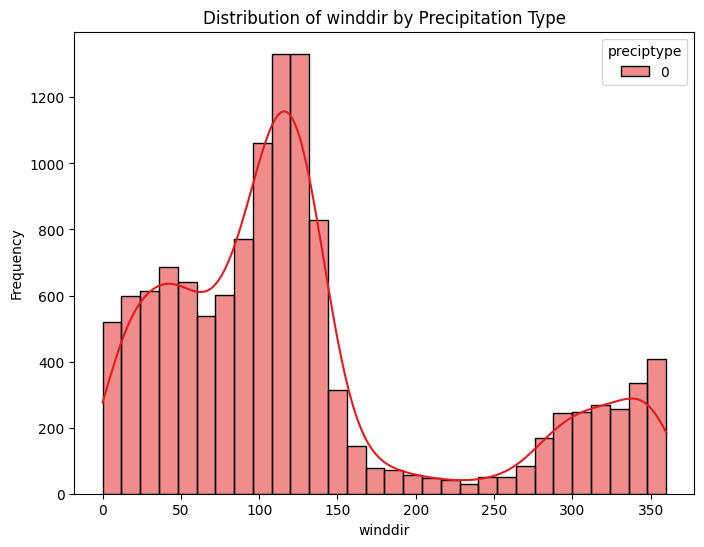

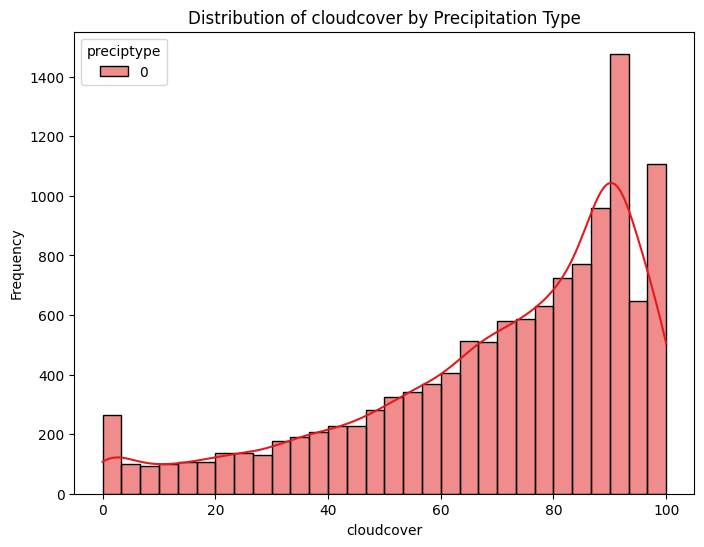

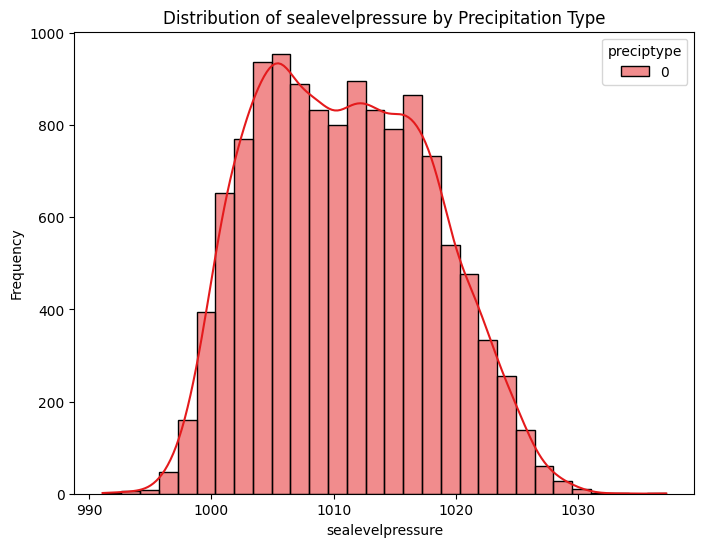

In [ ]:
import seaborn as sns

# Biểu đồ phân phối các đặc trưng
features = ['tempmax', 'tempmin', 'temp', 'humidity', 'winddir', 'cloudcover', 'sealevelpressure']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue='preciptype', kde=True, bins=30, palette='Set1')
    plt.title(f"Distribution of {feature} by Precipitation Type")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### ***Xây dựng mô hình***

In [ ]:
# Chia dữ liệu
features = ['tempmax', 'tempmin', 'temp', 'humidity', 'winddir', 'cloudcover', 'sealevelpressure']

X = data[features]
y = data['preciptype']

In [ ]:
import math
import pandas as pd
import random
from collections import Counter

# Chia dữ liệu ngẫu nhiên
def split_data(X, y, train_size=0.8):
    # Tạo các chỉ số cho X và y
    data = list(zip(X, y))
    random.shuffle(data)  # Xáo trộn dữ liệu
    split_idx = int(len(data) * train_size)  # Tính chỉ số chia
    train_data = data[:split_idx]
    test_data = data[split_idx:]

    # Tách X và y từ các phần tử trong train_data và test_data
    X_train, y_train = zip(*train_data)
    X_test, y_test = zip(*test_data)

    return list(X_train), list(y_train), list(X_test), list(y_test)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, y_train, X_test, y_test = split_data(X, y)

# Hàm tính khoảng cách Euclide giữa 2 điểm
def euclide_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

# Hàm dự đoán nhãn dựa vào KNN
def predict(X_train, y_train, test_point, k):
    distances = []
    # Tính khoảng cách từ test_point đến tất cả các điểm trong X_train
    for i in range(len(X_train)):
        distance = euclide_distance(X_train[i], test_point)
        distances.append((distance, y_train[i]))

    # Sắp xếp theo khoảng cách tăng dần và lấy k điểm gần nhất
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [label for _, label in distances[:k]]

    # Đếm số lượng nhãn trong k hàng xóm gần nhất
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]  # Nhãn xuất hiện nhiều nhất

# Hàm KNN cho toàn bộ tập dữ liệu
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        prediction = predict(X_train, y_train, test_point, k)
        y_pred.append(prediction)
    return y_pred

# Huấn luyện và dự đoán với k=35
k = 35
y_pred = knn(X_train, y_train, X_test, k)

# Hàm tính độ chính xác
def accuracy(y_true, y_pred):
    correct = sum([1 for true, pred in zip(y_true, y_pred) if true == pred])
    return correct / len(y_true)
acc = accuracy(y_test, y_pred)

# Thông tin mô hình
print(f"Tổng số mẫu dữ liệu: {len(X_train) + len(X_test)}")
print(f"Số mẫu dữ liệu dùng để huấn luyện: {len(X_train)}")
print(f"Số mẫu dữ liệu dùng để kiểm tra: {len(X_test)}")
print(f"Độ chính xác: {acc:.2%}\n\n")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### ***Đánh giá mô hình***

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

print(f"Độ chính xác: {acc:.2%}\n\n")

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print()


# Biểu đồ độ chính xác
print(f"Accuracy Score: {acc:.2f} *")

# Vẽ độ chính xác với matplotlib
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [acc], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Biểu đồ cột
# Tính số lượng dự đoán đúng và sai
correct_predictions = sum([1 for true, pred in zip(y_test, y_pred) if true == pred])
incorrect_predictions = len(y_test) - correct_predictions

# Dữ liệu cho biểu đồ
labels = ['Dự đoán đúng', 'Dự đoán sai']
values = [correct_predictions, incorrect_predictions]

# Tính tỷ lệ phần trăm
total = len(y_test)
correct_percentage = (correct_predictions / total) * 100
incorrect_percentage = (incorrect_predictions / total) * 100

# Vẽ biểu đồ hình cột
plt.figure(figsize=(9, 7))
bars = plt.bar(labels, values, color=['green', 'red'])

# Thêm số lượng và phần trăm ở trên mỗi cột
for bar, value, percentage in zip(bars, values, [correct_percentage, incorrect_percentage]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, f"{height} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=12)

# Thêm tiêu đề và nhãn cho các trục
plt.title('Dự đoán có mưa hay không')
plt.ylabel('Số lượng')
plt.show()


NameError: name 'acc' is not defined